In [1]:
import pandas as pd
import numpy as np

In [2]:
data_deleted = pd.read_csv('Last_version_deleted.csv',low_memory=False)
legitmate_data = pd.read_csv('Last_version_legitmate.csv',low_memory=False)

In [3]:
df = pd.concat(
    map(pd.read_csv, ['Last_version_deleted.csv', 'Last_version_legitmate.csv']))

In [7]:
# SVM Classification

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

X = df.loc[:, df.columns != 'Deleted']
y = df['Deleted']

X = X.drop(['Clean', 'Postags','Content','Author','phrase_tag','Followers','Following','Freq_unigram','Freq_bigram'], axis=1)
X = X.fillna(0)

X_normalized = MinMaxScaler().fit_transform(X.values)
X = pd.DataFrame(X_normalized)

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.25, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy For SVM is:',cm)
accuracy_score(y_test,y_pred)

Accuracy For SVM is: [[466 281]
 [165 567]]


0.6984448951994591

In [8]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.62      0.68       747
           1       0.67      0.77      0.72       732

    accuracy                           0.70      1479
   macro avg       0.70      0.70      0.70      1479
weighted avg       0.70      0.70      0.70      1479



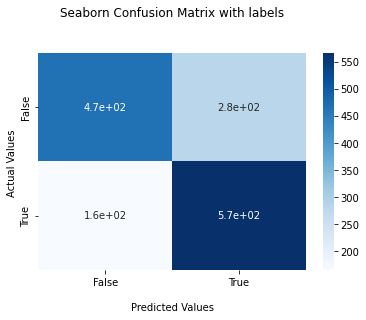

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm_1 = confusion_matrix(y_test, y_pred)
print(cm_1)
accuracy_score(y_test,y_pred)
print("Accuracy For Decision Tree:",metrics.accuracy_score(y_test, y_pred))

[[626 121]
 [164 568]]
Accuracy For Decision Tree: 0.8073022312373225


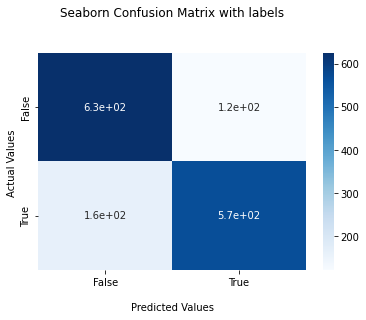

In [13]:
import seaborn as sns

ax = sns.heatmap(cm_1, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [14]:
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       747
           1       0.82      0.78      0.80       732

    accuracy                           0.81      1479
   macro avg       0.81      0.81      0.81      1479
weighted avg       0.81      0.81      0.81      1479

